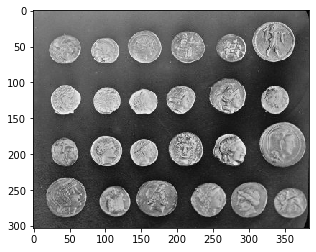

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
coins = data.coins()
hist = np.histogram(coins, bins=np.arange(0, 256))
fig, (ax1) = plt.subplots()
ax1.imshow(coins, cmap=plt.cm.gray,interpolation='nearest')

Text(0.5, 1.0, 'Canny detector')

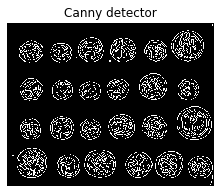

In [3]:
from skimage.feature import canny
edges = canny(coins/255.)
fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(edges, cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')
ax.set_title('Canny detector')
#Text(0.5, 1.0, 'Canny detector')

Text(0.5, 1.0, 'Filling the holes')

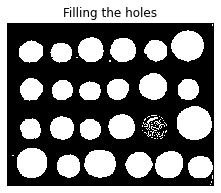

In [5]:
from scipy import ndimage as ndi
fill_coins = ndi.binary_fill_holes(edges)
fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(fill_coins, cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')
ax.set_title('Filling the holes')
#Text(0.5, 1.0, 'Filling the holes')

Text(0.5, 1.0, 'elevation_map')

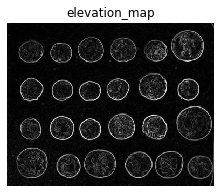

In [6]:
from skimage.filters import sobel
elevation_map = sobel(coins)
fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(elevation_map, cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')
ax.set_title('elevation_map')
#Text(0.5, 1.0, 'elevation_map')

In [8]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
from PIL import Image
from sklearn.cluster import KMeans
from skimage.filters import sobel
import skimage
import warnings
warnings.filterwarnings("ignore")

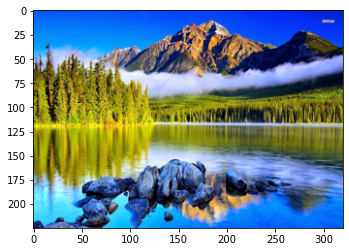

In [10]:
image=Image.open('sea.jpg')
image=image.resize((320,225))
image=np.array(image)
plt.imshow(image)

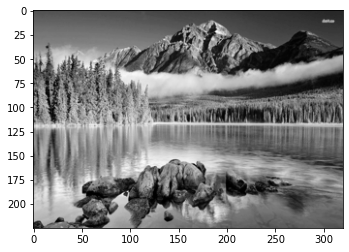

In [11]:
# Making the gray scale of the image
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

In [12]:
# What if we use the mean of the pixels in the whole image as threshold and kinda use it for segmentation
arr=gray.flatten()
for i in range(len(arr)):
    if arr[i]>=arr.mean() :
        arr[i]=1
    else:
        arr[i]=0
gray_segmented=arr.reshape(gray.shape[0],gray.shape[1])

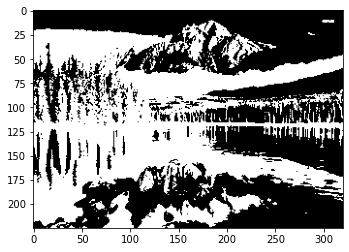

In [13]:
plt.imshow(gray_segmented,cmap='gray')

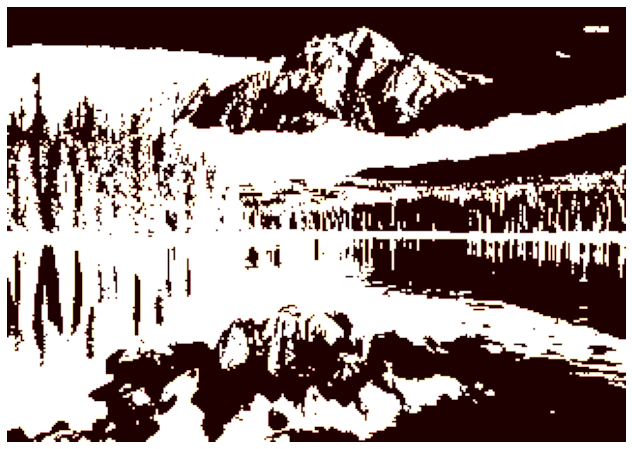

In [17]:
plt.figure(figsize=(18,8))
plt.imshow(gray_segmented,cmap='pink')
plt.axis("off")
plt.show()

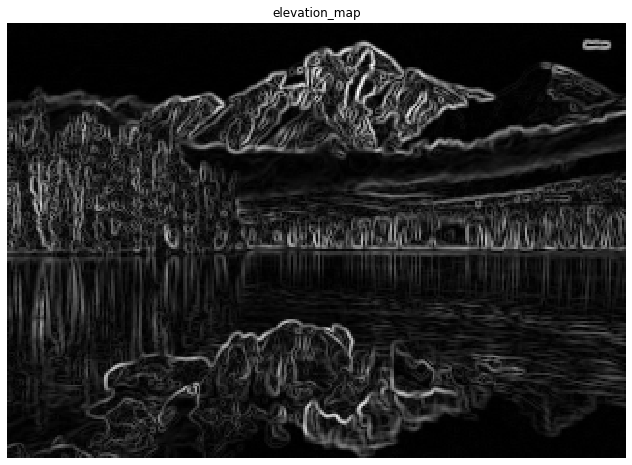

In [18]:
imm=image[:,:,0]
elevation_map = sobel(imm)

fig, ax = plt.subplots(figsize=(18,8))
ax.imshow(elevation_map, cmap='gray', interpolation='nearest')
ax.axis('off')
ax.set_title('elevation_map')
plt.show()

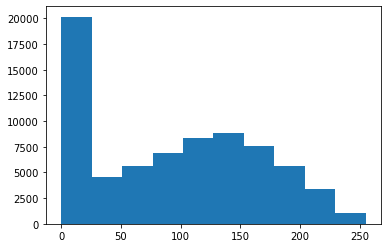

In [19]:
plt.hist(imm.flatten())
plt.show()

Text(0.5, 1.0, 'markers')

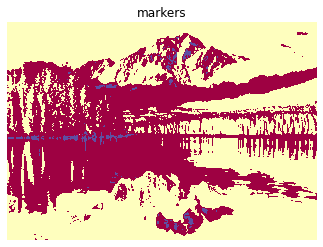

In [20]:
markers = np.zeros_like(imm)
markers[imm < 117] = 1
markers[imm > 232] = 2

fig, ax = plt.subplots(figsize=(8,4))
ax.imshow(markers, cmap='Spectral', interpolation='nearest')
ax.axis('off')
ax.set_title('markers')

In [23]:
cmap=plt.cm.gray
cmap = cm.get_cmap("Spectral")
colors = cmap(a / b)

NameError: name 'cm' is not defined

AttributeError: module 'matplotlib.cm' has no attribute 'spectral'

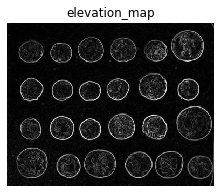

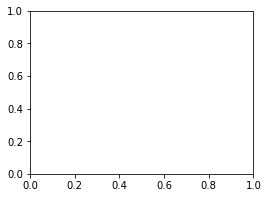

In [24]:
from skimage.filters import sobel

elevation_map = sobel(coins)

fig, ax = plt.subplots(figsize=(4, 3))

ax.imshow(elevation_map, cmap=plt.cm.gray, interpolation='nearest')

ax.axis('off')

ax.set_title('elevation_map')

markers = np.zeros_like(coins)

markers[coins < 30] = 1

markers[coins > 150] = 2

fig, ax = plt.subplots(figsize=(4, 3))

ax.imshow(markers, cmap=plt.cm.spectral, interpolation='nearest')

ax.axis('off')

ax.set_title('markers')

segmentation = morphology.watershed(elevation_map, markers)

fig, ax = plt.subplots(figsize=(4, 3))

ax.imshow(segmentation, cmap=plt.cm.gray, interpolation='nearest')

ax.axis('off')

ax.set_title('segmentation')

from skimage.color import label2rgb

segmentation = ndi.binary_fill_holes(segmentation - 1)

labeled_coins, _ = ndi.label(segmentation)

image_label_overlay = label2rgb(labeled_coins, image=coins)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3), sharex=True, sharey=True)

ax1.imshow(coins, cmap=plt.cm.gray, interpolation='nearest')

ax1.contour(segmentation, [0.5], linewidths=1.2, colors='y')

ax1.axis('off')

ax1.set_adjustable('box-forced')

ax2.imshow(image_label_overlay, interpolation='nearest')

ax2.axis('off')

ax2.set_adjustable('box-forced')

fig.subplots_adjust(**margins)